In [64]:
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import pandas as pd
from IPython.core.display import Image, display
%matplotlib inline

# 1. matplotlib recap

Text(0, 0.5, 'ylabel')

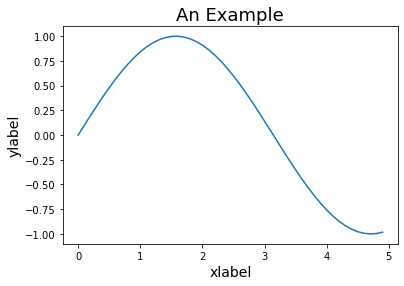

In [135]:
# a simple example
x = np.arange(0, 5, 0.1)
y = np.sin(x)
plt.plot(x, y)
plt.title('An Example',fontsize=18)
plt.xlabel('xlabel',fontsize=14)
plt.ylabel('ylabel',fontsize=14)

Text(0, 0.5, 'ylabel')

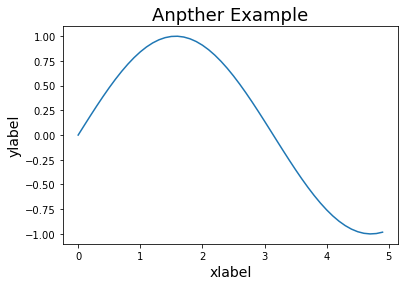

In [136]:
# or we can plot it in another way
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(x,y)
ax.set_title('Anpther Example',fontsize=18)
ax.set_xlabel('xlabel',fontsize=14)
ax.set_ylabel('ylabel',fontsize=14)

In [137]:
url = 'https://matplotlib.org/1.5.1/_images/fig_map.png'
display(Image(url=url))

Text(0.5, 1.0, 'ax2')

<Figure size 432x288 with 0 Axes>

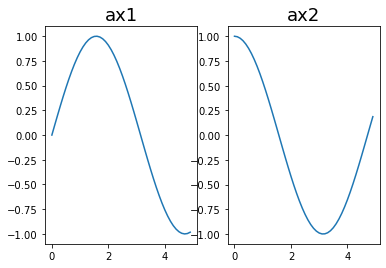

In [138]:
x = np.arange(0, 5, 0.1)
y1 = np.sin(x)
y2 = np.cos(x)

fig = plt.figure()  # an empty figure with no axes
fig, ax_lst = plt.subplots(1, 2)  # a figure with a 2x2 grid of Axes
ax_lst[0].plot(x,y1)
ax_lst[1].plot(x,y2)
ax_lst[0].set_title('ax1',fontsize=18)
ax_lst[1].set_title('ax2',fontsize=18)


# 2. geopandas visualization and data manipulation

## 2.1 Point, Line, Polygon

In [139]:
from shapely.geometry import Polygon,LineString, Point

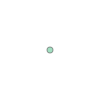

In [140]:
point = Point([0,0])
point

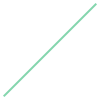

In [141]:
linestring = LineString([(0,0),(1,1)])
linestring

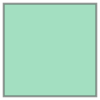

In [142]:
polygon = Polygon([(0, 0), (1, 0), (1, 1), (0, 1)])
polygon

## 2.2 transform a dataframe to a geodataframe

<AxesSubplot:>

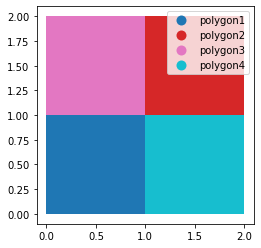

In [143]:
# first, let's hand code a geodataframe

polygon_lst = [Polygon([(0, 0), (1, 0), (1, 1), (0, 1)]),
              Polygon([(1, 1), (2, 1), (2, 2), (1, 2)]),
              Polygon([(0, 1), (1, 1), (1, 2), (0, 2)]),
              Polygon([(1, 0), (2, 0), (2, 1), (1, 1)])]

gdf = gpd.GeoDataFrame({'name':['polygon1','polygon2','polygon3','polygon4']},geometry=polygon_lst)
gdf.plot(column='name',legend=True)

In [144]:
# then convert a dataframe from a csv to a geodataframe
subway = pd.read_csv('https://data.cityofnewyork.us/api/views/kk4q-3rt2/rows.csv?accessType=DOWNLOAD')
subway.head()

,URL,OBJECTID,NAME,the_geom,LINE,NOTES
0,http://web.mta.info/nyct/service/,1,Astor Pl,POINT (-73.99106999861966 40.73005400028978),4-6-6 Express,"4 nights, 6-all times, 6 Express-weekdays AM s..."
1,http://web.mta.info/nyct/service/,2,Canal St,POINT (-74.00019299927328 40.71880300107709),4-6-6 Express,"4 nights, 6-all times, 6 Express-weekdays AM s..."
2,http://web.mta.info/nyct/service/,3,50th St,POINT (-73.98384899986625 40.76172799961419),1-2,"1-all times, 2-nights"
3,http://web.mta.info/nyct/service/,4,Bergen St,POINT (-73.97499915116808 40.68086213682956),2-3-4,"4-nights, 3-all other times, 2-all times"
4,http://web.mta.info/nyct/service/,5,Pennsylvania Ave,POINT (-73.89488591154061 40.66471445143568),3-4,"4-nights, 3-all other times"


In [145]:
subway['the_geom'][0]

'POINT (-73.99106999861966 40.73005400028978)'

In [146]:
float('POINT (-73.99106999861966 40.73005400028978)'.split('(')[1].split(')')[0].split(' ')[0])

-73.99106999861966

In [147]:
float('POINT (-73.99106999861966 40.73005400028978)'.split('(')[1].split(')')[0].split(' ')[1])

40.73005400028978

In [148]:
subway['the_geom'] = subway['the_geom'].apply(lambda x: x.split('(')[1].split(')')[0])

In [149]:
subway['the_geom'][0]

'-73.99106999861966 40.73005400028978'

In [150]:
subway['lat'] = subway['the_geom'].apply(lambda x: x.split(' ')[1]).astype(float)
subway['lng'] = subway['the_geom'].apply(lambda x: x.split(' ')[0]).astype(float)
subway.head()

,URL,OBJECTID,NAME,the_geom,LINE,NOTES,lat,lng
0,http://web.mta.info/nyct/service/,1,Astor Pl,-73.99106999861966 40.73005400028978,4-6-6 Express,"4 nights, 6-all times, 6 Express-weekdays AM s...",40.730054,-73.991070
1,http://web.mta.info/nyct/service/,2,Canal St,-74.00019299927328 40.71880300107709,4-6-6 Express,"4 nights, 6-all times, 6 Express-weekdays AM s...",40.718803,-74.000193
2,http://web.mta.info/nyct/service/,3,50th St,-73.98384899986625 40.76172799961419,1-2,"1-all times, 2-nights",40.761728,-73.983849
3,http://web.mta.info/nyct/service/,4,Bergen St,-73.97499915116808 40.68086213682956,2-3-4,"4-nights, 3-all other times, 2-all times",40.680862,-73.974999
4,http://web.mta.info/nyct/service/,5,Pennsylvania Ave,-73.89488591154061 40.66471445143568,3-4,"4-nights, 3-all other times",40.664714,-73.894886


In [151]:
geosubway = gpd.GeoDataFrame(
    subway, geometry=gpd.points_from_xy(subway['lng'], subway['lat']))

In [152]:
list(zip([1,2,3],[4,5,6]))

[(1, 4), (2, 5), (3, 6)]

/usr/local/anaconda3/envs/geo37/lib/python3.7/site-packages/pandas/core/dtypes/cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


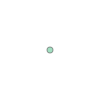

In [153]:
subway['geometry'] = [Point(i) for i in zip(subway['lng'],subway['lat'])]
subway['geometry'][0]

<AxesSubplot:>

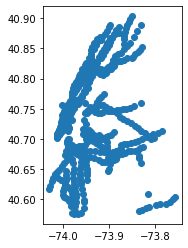

In [154]:
geosubway = gpd.GeoDataFrame(subway, geometry=subway['geometry'], crs='epsg:4326')
geosubway.plot()

## 2.3 coordinate system
epsg: https://epsg.io/

In [155]:
url = 'https://data.cityofnewyork.us/api/geospatial/tqmj-j8zm?method=export&format=GeoJSON'
nyc = gpd.read_file(url)
print(nyc.crs)

epsg:4326


(905464.7390380852, 1075092.8783935553, 112492.5738036502, 280480.09001459717)

<Figure size 1440x2160 with 0 Axes>

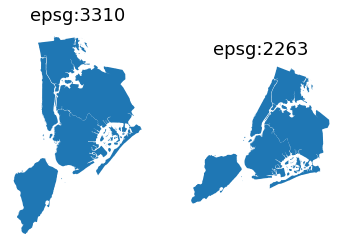

In [182]:
fig = plt.figure(figsize=(20,30))  
# 1 means 1 row, 2 means 2 columns of subplots
fig, ax_lst = plt.subplots(1, 2)
nyc.to_crs('epsg:3310').plot(ax=ax_lst[0])
ax_lst[0].set_title('epsg:3310',fontsize=18)
ax_lst[0].axis('off')
nyc.to_crs('epsg:2263').plot(ax=ax_lst[1])
ax_lst[1].set_title('epsg:2263',fontsize=18)
ax_lst[1].axis('off')

## 2.4 Legend

(905464.7390380852, 1075092.8783935553, 112492.5738036502, 280480.09001459717)

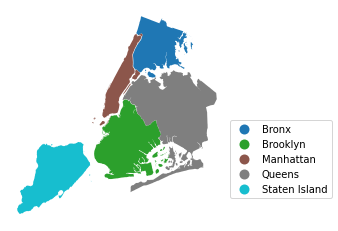

In [157]:
# how to offset the legend and customize colors?
fig = plt.figure()  
ax = fig.add_subplot(1,1,1)
nyc.to_crs('epsg:2263').plot(ax=ax,column='boro_name',legend=True)
# to customize a legend in a geopandas plot
# take it out and edit in a matplotlib way is easier 
# but please keep in mind that get_legend() method does not work when plotting continuous values
leg = ax.get_legend()
leg.set_bbox_to_anchor((0., 0., 1.5, 0.5))
ax.axis('off')

### more details in customizing a legend

In [158]:
# generate 4 series of random numbers from a normal distribution
random_value = np.random.randn(len(nyc))
nyc['example1'] = random_value
random_value = np.random.randn(len(nyc))
nyc['example2'] = random_value
random_value = np.random.randn(len(nyc))
nyc['example3'] = random_value
random_value = np.random.randn(len(nyc))
nyc['example4'] = random_value

(905464.7390380852, 1075092.8783935553, 112492.5738036502, 280480.09001459717)

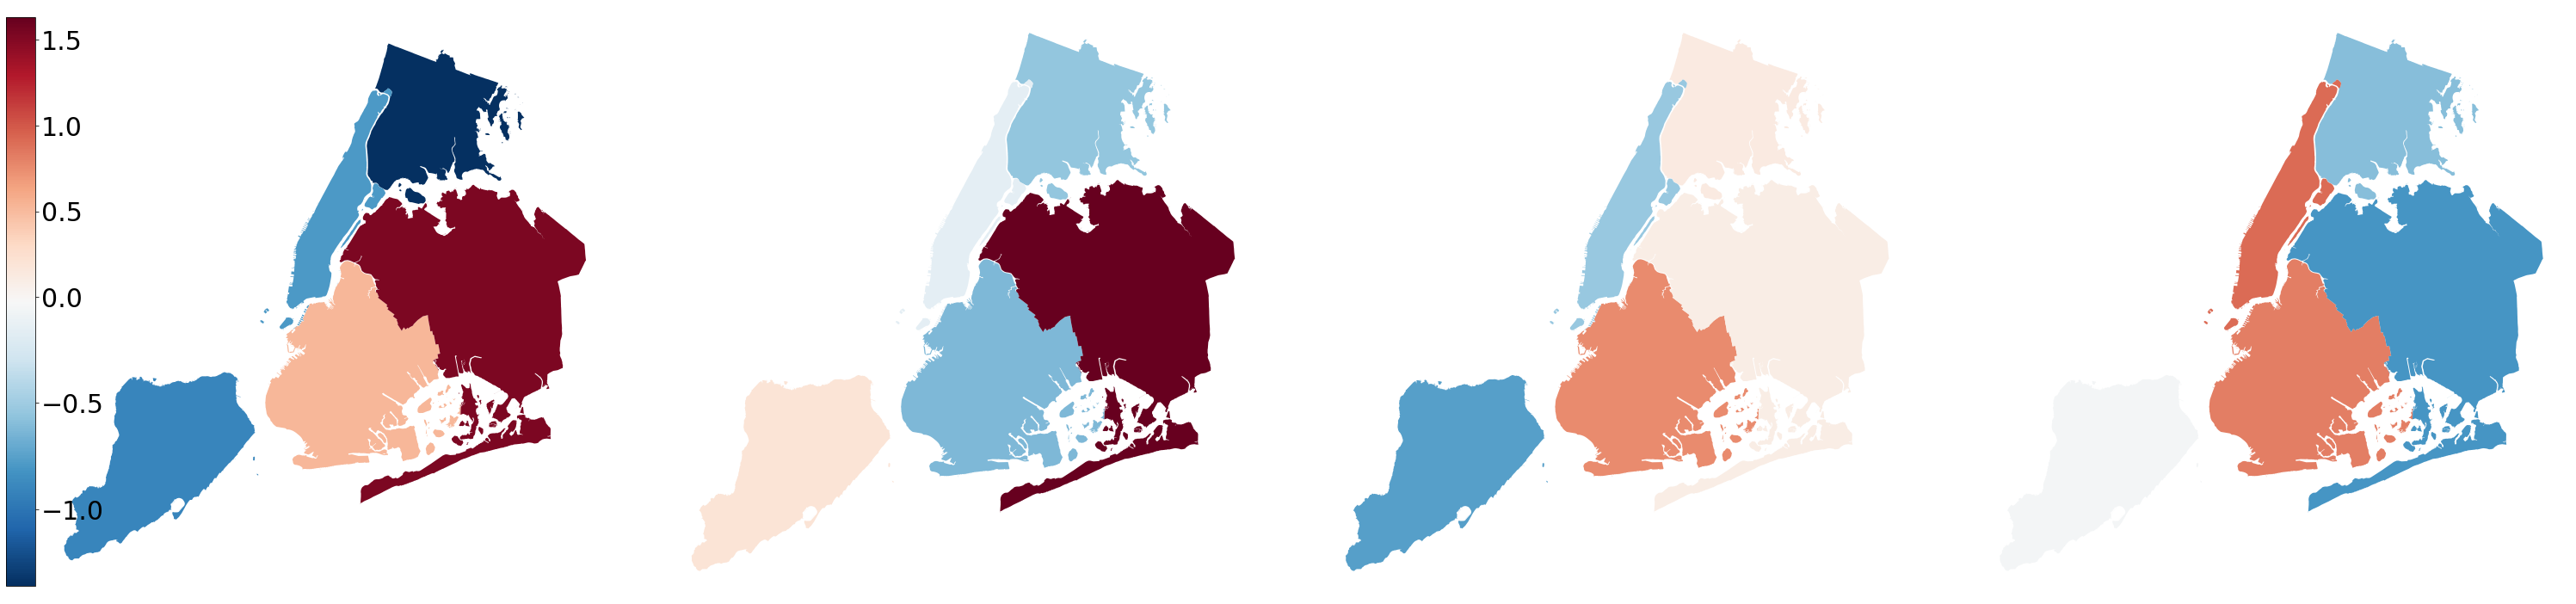

In [159]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as mcolors
vmin, vmax, vcenter = nyc[['example1','example2','example3','example4']].min().min(),\
                      nyc[['example1','example2','example3','example4']].max().max(),\
                      nyc[['example1','example2','example3','example4']].mean().mean()
# get the max, min, mean values of the four series
norm = mcolors.TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax) 
# define the max, min, and center of a color bar
cmap = 'RdBu_r' 
# color bar
cbar = plt.cm.ScalarMappable(norm=norm, cmap=cmap) 
# apply predifined norm and colors to generate a color vector

missing_kwds = dict(color='grey', label='No Data')

# one legend for four figures
fig,ax = plt.subplots(1,4,figsize=(42,10))  
nyc.to_crs('epsg:2263').plot(ax=ax[0],column='example1',cmap=cmap, 
                         norm=norm,legend=False,missing_kwds=missing_kwds)
nyc.to_crs('epsg:2263').plot(ax=ax[1],column='example2',cmap=cmap, 
                         norm=norm,legend=False,missing_kwds=missing_kwds)
nyc.to_crs('epsg:2263').plot(ax=ax[2],column='example3',cmap=cmap, 
                         norm=norm,legend=False,missing_kwds=missing_kwds)
nyc.to_crs('epsg:2263').plot(ax=ax[3],column='example4',cmap=cmap, 
                         norm=norm,legend=False,missing_kwds=missing_kwds)

# "patch" the legend to the fisrt ax 
divider = make_axes_locatable(ax[0])
cax = divider.append_axes("left", size="5%", pad=0.05)
cb = fig.colorbar(cbar, cax=cax)
cb.ax.tick_params(labelsize=30)
fig.tight_layout()
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
ax[3].axis('off')

### how to add a legend (instead of a colorbar) manually?

(905464.7390380852, 1075092.8783935553, 112492.5738036502, 280480.09001459717)

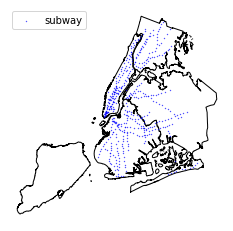

In [160]:
# another limitation in matplotlib
# it cannot pass a polygon to a legend
# check this: https://github.com/geopandas/geopandas/issues/660
fig = plt.figure()  
ax = fig.add_subplot(1,1,1)
nyc.to_crs('epsg:2263').plot(ax=ax,facecolor='w',edgecolor='k',linewidth=1,label='NYC boundary')
geosubway.to_crs('epsg:2263').plot(ax=ax,color='b',markersize=0.1,label='subway')
ax.legend()
ax.axis('off')

(905464.7390380852, 1075092.8783935553, 112492.5738036502, 280480.09001459717)

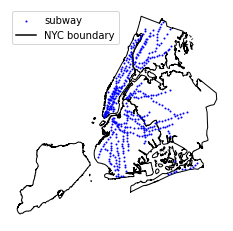

In [161]:
# to solve this problem, we need to manually add a legend
from matplotlib.lines import Line2D

fig = plt.figure()  
ax = fig.add_subplot(1,1,1)
nyc.to_crs('epsg:2263').plot(ax=ax,facecolor='w',edgecolor='k',linewidth=1)
geosubway.to_crs('epsg:2263').plot(ax=ax,color='b',markersize=1,label='subway')

handles, labels = ax.get_legend_handles_labels()
line = Line2D([0], [0],label='NYC boundary', color='k')
handles.append(line) 
ax.legend(handles=handles)
ax.axis('off')

## 2.5 patch for missing values

In [162]:
neighborhood = gpd.read_file('https://data.cityofnewyork.us/api/geospatial/cpf4-rkhq?method=export&format=GeoJSON')
neighborhood.head()

,ntacode,shape_area,county_fips,ntaname,shape_leng,boro_name,boro_code,geometry
0,QN08,77412747.7604,081,St. Albans,45401.3169155,Queens,4,"MULTIPOLYGON (((-73.75205 40.70523, -73.75174 ..."
1,BK69,20528197.0577,047,Clinton Hill,23971.4662361,Brooklyn,3,"MULTIPOLYGON (((-73.95337 40.68064, -73.95328 ..."
2,BK46,17782095.6686,047,Ocean Parkway South,21975.9967416,Brooklyn,3,"MULTIPOLYGON (((-73.97075 40.62563, -73.97047 ..."
3,BX28,25666124.7136,005,Van Cortlandt Village,21945.7195842,Bronx,2,"MULTIPOLYGON (((-73.88705 40.88435, -73.88705 ..."
4,QN55,82461393.5232,081,South Ozone Park,36708.1692925,Queens,4,"MULTIPOLYGON (((-73.80577 40.68293, -73.80552 ..."


In [163]:
# let's randomly change some shape_area values to np.nan
neighborhood.iloc[14,1] = np.nan
neighborhood.iloc[36,1] = np.nan
neighborhood.iloc[73,1] = np.nan
neighborhood.iloc[96,1] = np.nan
neighborhood.iloc[126,1] = np.nan
neighborhood['shape_area'] = neighborhood['shape_area'].astype(float)

(905464.73902893, 1075092.878585814, 112492.57379449514, 280480.09020685364)

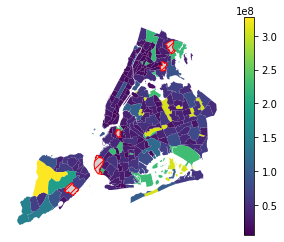

In [164]:
fig = plt.figure()  
ax = fig.add_subplot(1,1,1)
neighborhood.to_crs('epsg:2263').plot(ax=ax,column='shape_area',legend=True, missing_kwds={
                                                            "color": "lightgrey",
                                                            "edgecolor": "red",
                                                            "hatch": "///",
                                                            "label": "Missing values",
                                                            },)
ax.axis('off')

## 2.6 add base map

(-8269186.976031984, -8201155.123517304, 4935223.852341987, 5002970.115148904)

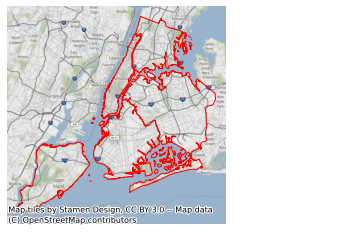

In [165]:
import contextily as cx
fig = plt.figure()  
ax = fig.add_subplot(1,1,1)
# the crs has to be 3857
nyc.to_crs(epsg=3857).plot(ax=ax,facecolor='None',edgecolor='red',linewidth=1)
cx.add_basemap(ax)
ax.axis('off')

## 2.7 spatial join
### case 1, assign subway stations into neighborhood

In [166]:
nta.head()

,OBJECTID,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape__Area,Shape__Length,geometry
0,1,4,Queens,081,QN08,St. Albans,7.741276e+07,45401.225284,"POLYGON ((1052995.726 196310.370, 1053081.208 ..."
1,2,3,Brooklyn,047,BK69,Clinton Hill,2.052822e+07,23971.451296,"POLYGON ((997182.912 187258.558, 997207.489 18..."
2,3,3,Brooklyn,047,BK46,Ocean Parkway South,1.778210e+07,21975.996742,"POLYGON ((992369.970 167214.432, 992446.540 16..."
3,4,2,Bronx,005,BX28,Van Cortlandt Village,2.566604e+07,21945.695430,"POLYGON ((1015481.466 261493.438, 1015482.374 ..."
4,5,4,Queens,081,QN55,South Ozone Park,8.246139e+07,36708.169293,"POLYGON ((1038120.052 188149.840, 1038189.894 ..."


In [167]:
nta = gpd.read_file('https://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/NYC_Neighborhood_Tabulation_Areas_2010/FeatureServer/0/query?where=1=1&outFields=*&outSR=4326&f=pgeojson')
nta = nta.to_crs('epsg:2263')
geosubway = geosubway.to_crs('epsg:2263')
geosubway = gpd.sjoin(geosubway,nta,op='within',how='left')
geosubway.head()

/usr/local/anaconda3/envs/geo37/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3364: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


,URL,OBJECTID_left,NAME,the_geom,LINE,NOTES,lat,lng,geometry,index_right,OBJECTID_right,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape__Area,Shape__Length
0,http://web.mta.info/nyct/service/,1,Astor Pl,-73.99106999861966 40.73005400028978,4-6-6 Express,"4 nights, 6-all times, 6 Express-weekdays AM s...",40.730054,-73.991070,POINT (986725.002 205255.053),57.0,58.0,1.0,Manhattan,061,MN23,West Village,2.497065e+07,28621.351532
1,http://web.mta.info/nyct/service/,2,Canal St,-74.00019299927328 40.71880300107709,4-6-6 Express,"4 nights, 6-all times, 6 Express-weekdays AM s...",40.718803,-74.000193,POINT (984196.500 201155.840),43.0,44.0,1.0,Manhattan,061,MN24,SoHo-TriBeCa-Civic Center-Little Italy,2.503268e+07,26855.031664
2,http://web.mta.info/nyct/service/,3,50th St,-73.98384899986625 40.76172799961419,1-2,"1-all times, 2-nights",40.761728,-73.983849,POINT (988724.216 216795.191),176.0,177.0,1.0,Manhattan,061,MN17,Midtown-Midtown South,3.019131e+07,27032.612329
3,http://web.mta.info/nyct/service/,4,Bergen St,-73.97499915116808 40.68086213682956,2-3-4,"4-nights, 3-all other times, 2-all times",40.680862,-73.974999,POINT (991184.246 187333.844),188.0,189.0,3.0,Brooklyn,047,BK37,Park Slope-Gowanus,4.250524e+07,31437.041668
4,http://web.mta.info/nyct/service/,5,Pennsylvania Ave,-73.89488591154061 40.66471445143568,3-4,"4-nights, 3-all other times",40.664714,-73.894886,POINT (1013411.541 181467.289),80.0,81.0,3.0,Brooklyn,047,BK85,East New York (Pennsylvania Ave),1.939753e+07,24226.851883


(905464.3248168996, 1075092.4949631486, 112495.56277270934, 280483.1151795652)

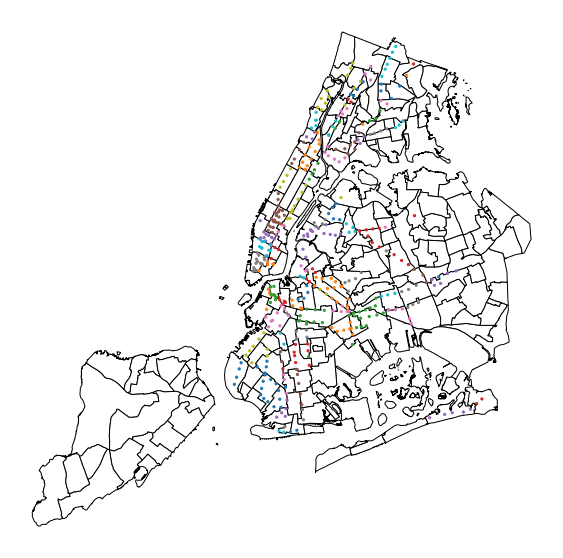

In [169]:
fig = plt.figure(figsize=(10,10))  
ax = fig.add_subplot(1,1,1)
nta.to_crs('epsg:2263').plot(ax=ax,facecolor='w',edgecolor='k',linewidth=1)
geosubway.to_crs('epsg:2263').plot(ax=ax,column='NTAName',markersize=5)
ax.axis('off')

### case 2, calculate population at each zip code while only NTA-level population data is available
Assume population is evenly distributed at each neighborhood.

step 1. spatial join zip code and NTA

step 2. calculate the intersection area

step 3, calculate the population

In [170]:
nta_population = pd.read_csv('https://data.cityofnewyork.us/api/views/swpk-hqdp/rows.csv?accessType=DOWNLOAD')
zipcode = gpd.read_file('https://data.beta.nyc/dataset/3bf5fb73-edb5-4b05-bb29-7c95f4a727fc/resource/894e9162-871c-4552-a09c-c6915d8783fb/download/zip_code_040114.geojson')
nta_population = nta_population.groupby(['NTA Code']).agg({'Population':sum})

In [171]:
nta = nta.merge(nta_population,left_on='NTACode',right_on='NTA Code',how='left')
nta = nta.to_crs(epsg=2263)
zipcode = zipcode.to_crs(epsg=2263)

(905410.7560418443, 1075212.5382575549, 112379.53306470133, 280488.64040375606)

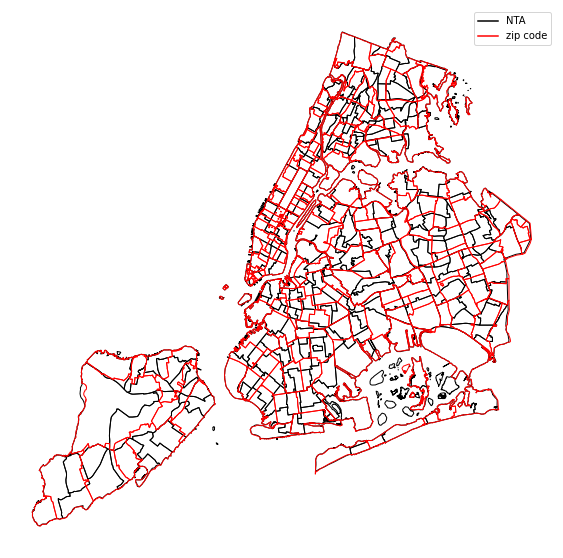

In [172]:
# zip code and neighborhoods are not perfectly matched
fig,ax = plt.subplots(figsize=(10,10))
nta.to_crs(epsg=2263).plot(ax=ax,facecolor='None',edgecolor='k',label='nta')
zipcode.to_crs(epsg=2263).plot(ax=ax,facecolor='None',edgecolor='r',label='zipcode')
handles, labels = ax.get_legend_handles_labels()
nta_line = Line2D([0], [0],label='NTA', color='k')
zipcode_line = Line2D([0], [0],label='zip code', color='r')

handles.append(nta_line) 
handles.append(zipcode_line) 
ax.legend(handles=handles)
ax.axis('off')

In [174]:
zipcode['zipcodearea'] = zipcode.geometry.area
nta['ntaearea'] = nta.geometry.area
zipcode = zipcode.loc[zipcode.geometry.is_valid == True]
nta = nta.loc[nta.geometry.is_valid == True]
zipcode = gpd.sjoin(zipcode,nta,op='intersects',how='left')
zipcode = zipcode.dropna(subset=['OBJECTID'])

/usr/local/anaconda3/envs/geo37/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3364: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [173]:
zipcode.shape

(263, 13)

In [176]:
zipcode.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,...,OBJECTID,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape__Area,Shape__Length,Population,ntaearea
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,...,14.0,4.0,Queens,081,QN03,Springfield Gardens South-Brookville,4.328767e+07,45320.235675,39082.0,4.328769e+07
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,...,157.0,4.0,Queens,081,QN02,Springfield Gardens North,2.842785e+07,25452.462714,50850.0,2.842786e+07
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,...,158.0,4.0,Queens,081,QN76,Baisley Park,4.404070e+07,31477.804269,70332.0,4.404071e+07
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,...,5.0,4.0,Queens,081,QN55,South Ozone Park,8.246139e+07,36708.169293,154784.0,8.246143e+07
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,...,42.0,3.0,Brooklyn,047,BK96,Rugby-Remsen Village,3.270645e+07,30951.654455,113260.0,3.270646e+07


(1027181.1111013403,
 1058207.5637525436,
 176405.32898997923,
 192146.82558138113)

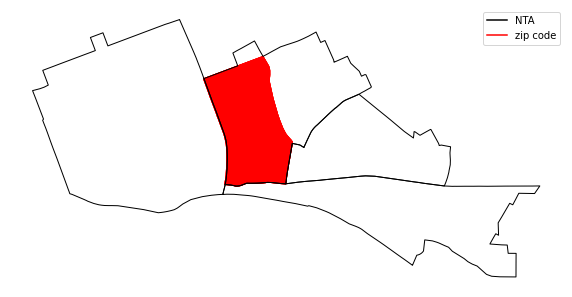

In [100]:
fig,ax = plt.subplots(figsize=(10,10))
zipcode.loc[zipcode['ZIPCODE']=='11436'].plot(ax=ax,facecolor='red',edgecolor='red')
nta.loc[nta['NTACode']=='QN03'].plot(ax=ax,facecolor='None')
nta.loc[nta['NTACode']=='QN02'].plot(ax=ax,facecolor='None')
nta.loc[nta['NTACode']=='QN55'].plot(ax=ax,facecolor='None')
nta.loc[nta['NTACode']=='QN76'].plot(ax=ax,facecolor='None')

handles, labels = ax.get_legend_handles_labels()
handles.append(nta_line) 
handles.append(zipcode_line) 
ax.legend(handles=handles)
ax.axis('off')

In [101]:
def intersectionArea(row,nta,zipcode):
    ntaID = row['OBJECTID']
    zipcodeID = row['ZIPCODE']
    zipcode_geometry = zipcode.loc[zipcode['ZIPCODE']==zipcodeID].geometry.values[0]
    nta_geometry = nta.loc[nta['OBJECTID']==ntaID].geometry.values[0]
    intersectionarea = zipcode_geometry.intersection(nta_geometry).area
    return intersectionarea


In [102]:
zipcode['intersectionarea'] = zipcode.apply(intersectionArea, args=(nta,zipcode),axis=1)
zipcode['zipcode_population'] = zipcode['intersectionarea']/zipcode['ntaearea']*zipcode['Population']

In [103]:
zipcode_population = zipcode.groupby(['ZIPCODE']).agg({'zipcode_population':'sum'})
zipcode = gpd.read_file('https://data.beta.nyc/dataset/3bf5fb73-edb5-4b05-bb29-7c95f4a727fc/resource/894e9162-871c-4552-a09c-c6915d8783fb/download/zip_code_040114.geojson')
zipcode = zipcode.merge(zipcode_population,on=['ZIPCODE'])

Text(0.5, 1.0, 'NTA population')

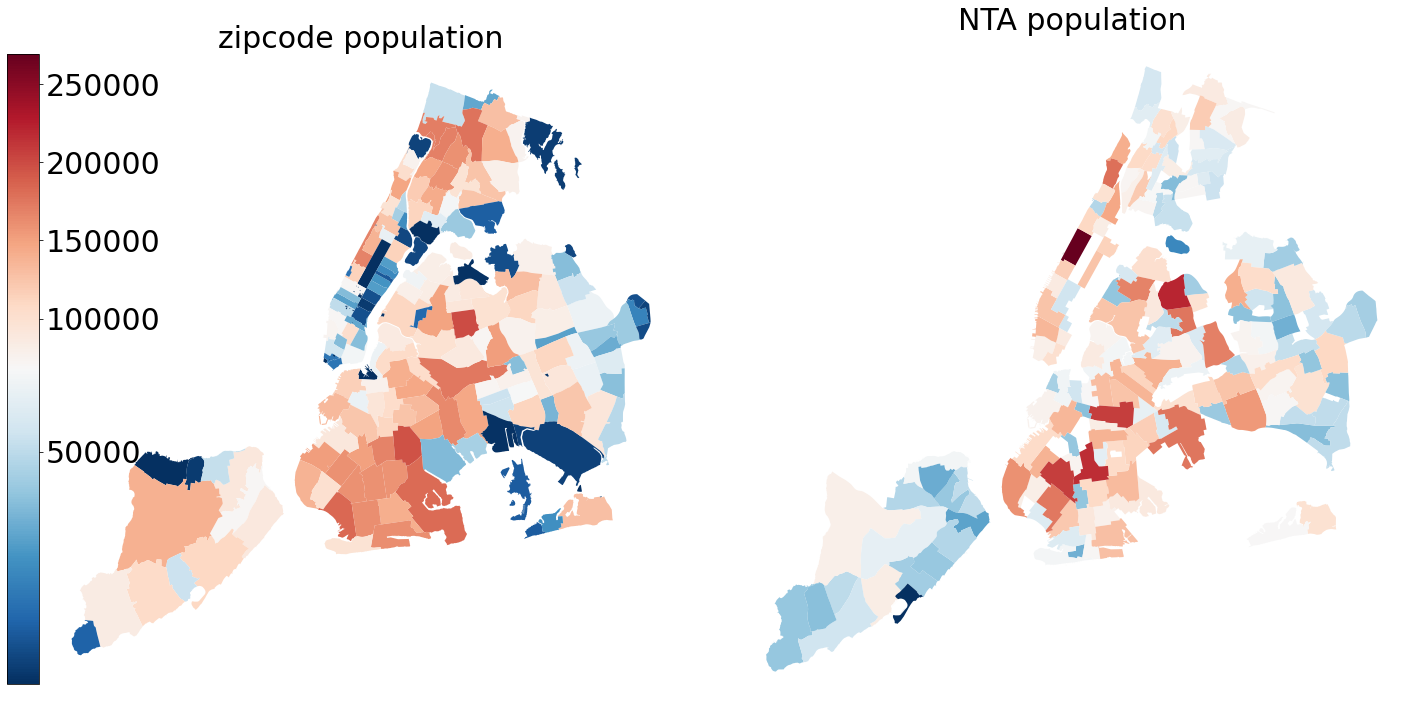

In [104]:
vmin, vmax, vcenter = min(zipcode['zipcode_population'].min(),nta['Population'].min()),\
                      max(zipcode['zipcode_population'].max(),nta['Population'].max()),\
                      0.5*sum((zipcode['zipcode_population'].median(),nta['Population'].median()))
# get the max, min, mean values of the four series
norm = mcolors.TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax) 
# define the max, min, and center of a color bar
cmap = 'RdBu_r' 
# color bar
cbar = plt.cm.ScalarMappable(norm=norm, cmap=cmap) 
# apply predifined norm and colors to generate a color vector

missing_kwds = dict(color='grey', label='No Data')

# one legend for four figures
fig,ax = plt.subplots(1,2,figsize=(20,10))  
zipcode.to_crs('epsg:2263').plot(ax=ax[0],column='zipcode_population',cmap=cmap, 
                         norm=norm,legend=False,missing_kwds=missing_kwds)
nta.to_crs('epsg:2263').plot(ax=ax[1],column='Population',cmap=cmap, 
                         norm=norm,legend=False,missing_kwds=missing_kwds)


# "patch" the legend to the fisrt ax 
divider = make_axes_locatable(ax[0])
cax = divider.append_axes("left", size="5%", pad=0.05)
cb = fig.colorbar(cbar, cax=cax)
cb.ax.tick_params(labelsize=30)
fig.tight_layout()
ax[0].axis('off')
ax[0].set_title('zipcode population',fontsize=30)
ax[1].axis('off')
ax[1].set_title('NTA population',fontsize=30)


In [105]:
zipcode.zipcode_population.sum()

14761179.373943796

In [106]:
nta.Population.sum()

14250940

# 3. 3D plots

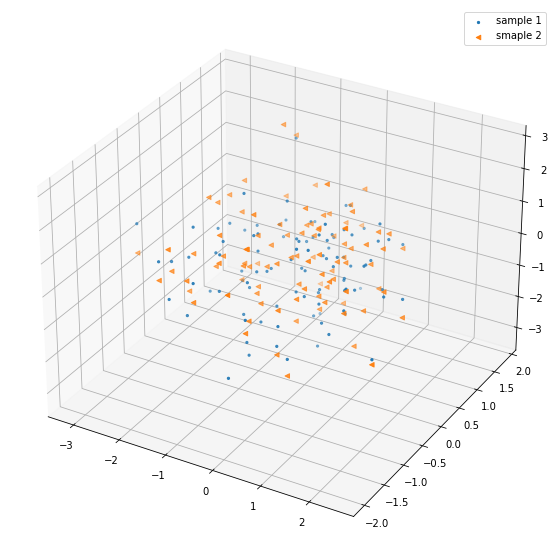

In [107]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
x = np.random.randn(100)
y = np.random.randn(100)
z1 = np.random.randn(100)
z2 = np.random.randn(100)
ax.scatter(x, y, z1, marker='.',label='sample 1')
ax.scatter(x, y, z2, marker='<',label='smaple 2')
ax.legend()


# 4. Interactive visualization
more details are available at: https://docs.kepler.gl/docs/keplergl-jupyter

https://jamesopacich.medium.com/display-a-kepler-gl-map-69d807dae082

In [108]:
# Load an empty map
from keplergl import KeplerGl
map_nyc = KeplerGl()
map_nyc.add_data(nta,name='nta')
map_nyc.add_data(zipcode,name='zipcode')

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


In [109]:
display(map_nyc)

KeplerGl(data={'nta': {'index': [0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23…

In [110]:
map_nyc.save_to_html(file_name='nyc_map.html')

Map saved to nyc_map.html!


In [ ]:
# check more at https://nyu.carto.com/login